In [1]:
# Please visit:
#
# https://download.nkg-mn.com/credo/anomalies/
#
# Pretrained dots_v2.h5 and others can be downloaded from mentioned website.

In [2]:
from commons import *
from dataset_loader import load_from_file
from IPython.display import display
import matplotlib.pyplot as plt
import cv2

DOTS_DST = 'cache/dots_v3_spread.pickle'
TRACKS_DST = 'cache/tracks_v3_spread.pickle'
WORMS_DST = 'cache/worms_v3_spread.pickle'
ARTIFACTS_DST = 'cache/artifacts_v3_spread.pickle'

DOTS_AC = 'cache/dots_v3_spread.h5'
TRACKS_AC = 'cache/tracks_v3_spread.h5'
WORMS_AC = 'cache/worms_v3_spread.h5'
ARTIFACTS_AC = 'cache/artifacts_v3_spread.h5'


def train_and_test(train_set, validation_set, fn):
    autoencoder = original_autoencoder(64)
    autoencoder = train_or_cache(train_set, autoencoder, fn, validation_set=validation_set, force_train=True)

    for df_func, df_name in zip(
            [dm_func_mean],
            ['mean']
    ):
        for img_set, set_names in zip([validation_set], ['train']):
            decoded = autoencoder.predict(img_set)

            vis, errors = visualize_predictions(decoded, img_set, df_func, False, 16)
            img_path = fn.replace('.h5', '-vis.png')
            hist_path = fn.replace('.h5', '-hist.png')
            cv2.imwrite(img_path, vis)
            display(Image.open(img_path))
            if len(img_set) > 256:
                vis, errors = visualize_predictions(decoded, img_set, df_func, False)
                img_path = fn.replace('.h5', '-vis_full.png')
                cv2.imwrite(img_path, vis)

            plt.figure(figsize=(8,6))
            plt.hist(errors, bins=100, alpha=0.5, label=set_names)
            plt.xlabel("Data", size=14)
            plt.ylabel("Count", size=14)
            plt.title(df_name)
            plt.legend(loc='upper right')
            plt.savefig(hist_path)


def load_and_train(src, out):
    images, augmented = load_from_file(src)
    train_and_test(np.expand_dims(augmented, axis=-1), np.expand_dims(images, axis=-1), out)

320
0
128
18496
0
256
0
262160
278528
0
36928
0
256
18464
0
128
289
Epoch 1/30
1290/1290 [==============================] - 18s 12ms/step - loss: 0.0256 - accuracy: 0.9522 - val_loss: 6.0790e-04 - val_accuracy: 0.9710
Epoch 2/30
1290/1290 [==============================] - 16s 12ms/step - loss: 3.7702e-04 - accuracy: 0.9707 - val_loss: 1.4371e-04 - val_accuracy: 0.9710
Epoch 3/30
1290/1290 [==============================] - 16s 12ms/step - loss: 2.1445e-04 - accuracy: 0.9707 - val_loss: 1.0126e-04 - val_accuracy: 0.9710
Epoch 4/30
1290/1290 [==============================] - 16s 12ms/step - loss: 7.7287e-05 - accuracy: 0.9707 - val_loss: 8.7468e-05 - val_accuracy: 0.9710
Epoch 5/30
1290/1290 [==============================] - 16s 12ms/step - loss: 8.0936e-05 - accuracy: 0.9707 - val_loss: 6.0473e-05 - val_accuracy: 0.9710
Epoch 6/30
1290/1290 [==============================] - 16s 12ms/step - loss: 5.2140e-05 - accuracy: 0.9707 - val_loss: 4.6633e-05 - val_accuracy: 0.9710
Epoch 7/30
1

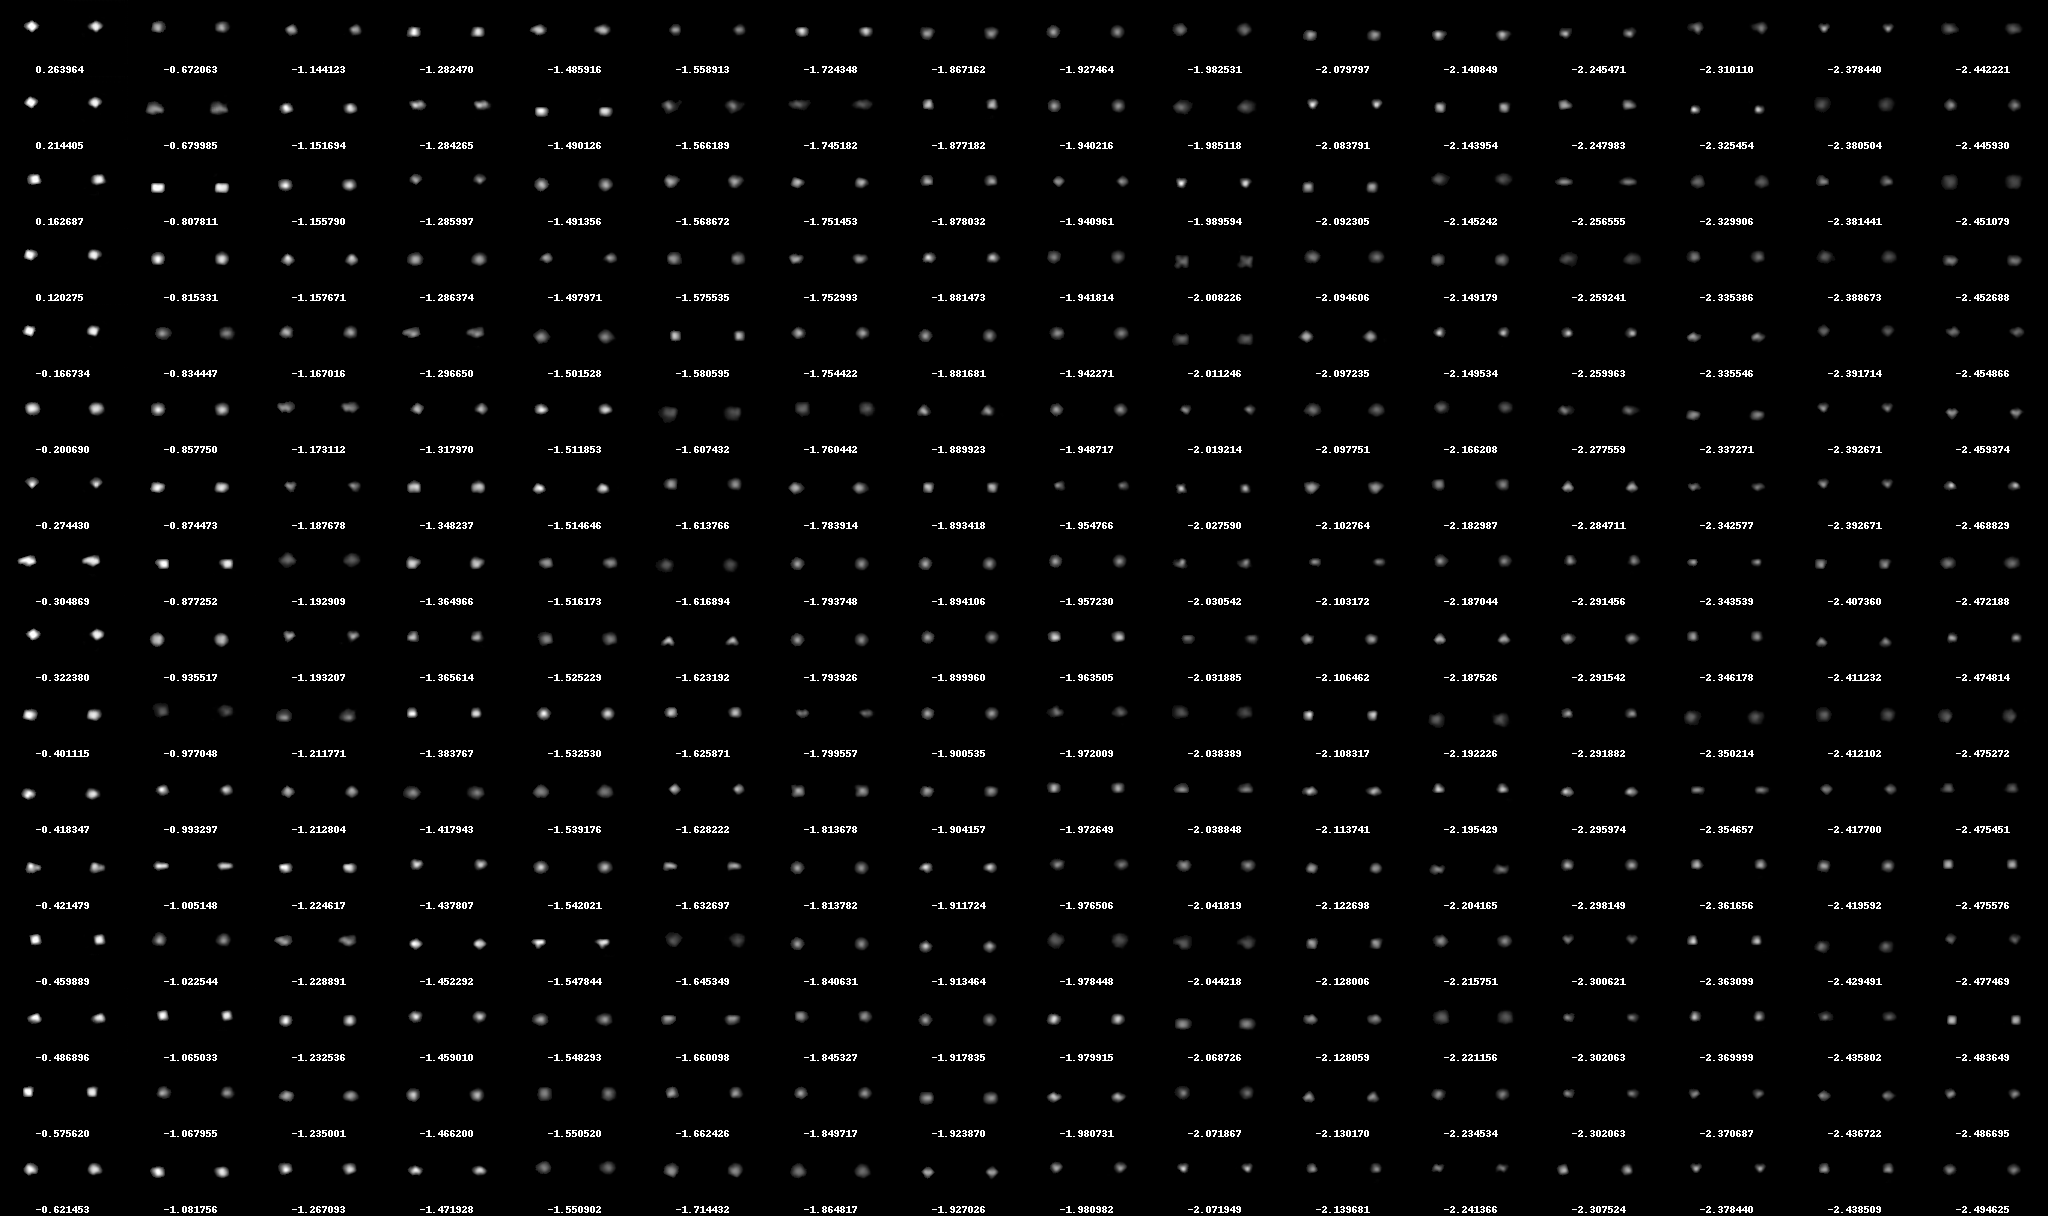

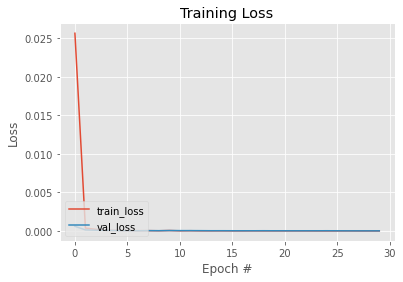

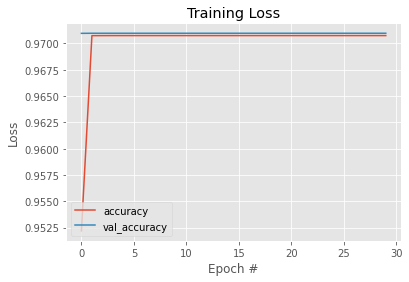

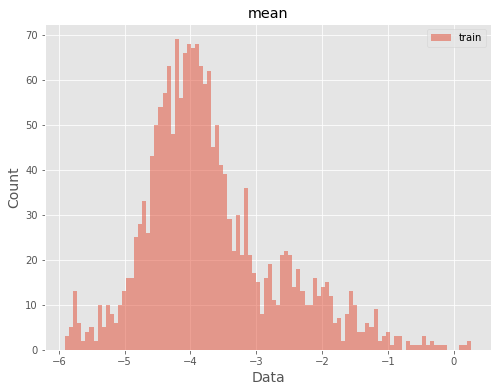

In [3]:
load_and_train(DOTS_DST, DOTS_AC)

320
0
128
18496
0
256
0
262160
278528
0
36928
0
256
18464
0
128
289
Epoch 1/30
2108/2108 [==============================] - 26s 12ms/step - loss: 0.0172 - accuracy: 0.9266 - val_loss: 0.0064 - val_accuracy: 0.9327
Epoch 2/30
2108/2108 [==============================] - 25s 12ms/step - loss: 0.0041 - accuracy: 0.9328 - val_loss: 4.9941e-04 - val_accuracy: 0.9343
Epoch 3/30
2108/2108 [==============================] - 25s 12ms/step - loss: 5.9660e-04 - accuracy: 0.9341 - val_loss: 3.7737e-04 - val_accuracy: 0.9343
Epoch 4/30
2108/2108 [==============================] - 25s 12ms/step - loss: 3.8694e-04 - accuracy: 0.9341 - val_loss: 3.3655e-04 - val_accuracy: 0.9343
Epoch 5/30
2108/2108 [==============================] - 25s 12ms/step - loss: 3.7160e-04 - accuracy: 0.9341 - val_loss: 3.2381e-04 - val_accuracy: 0.9343
Epoch 6/30
2108/2108 [==============================] - 25s 12ms/step - loss: 3.5641e-04 - accuracy: 0.9341 - val_loss: 3.0419e-04 - val_accuracy: 0.9343
Epoch 7/30
2108/2108

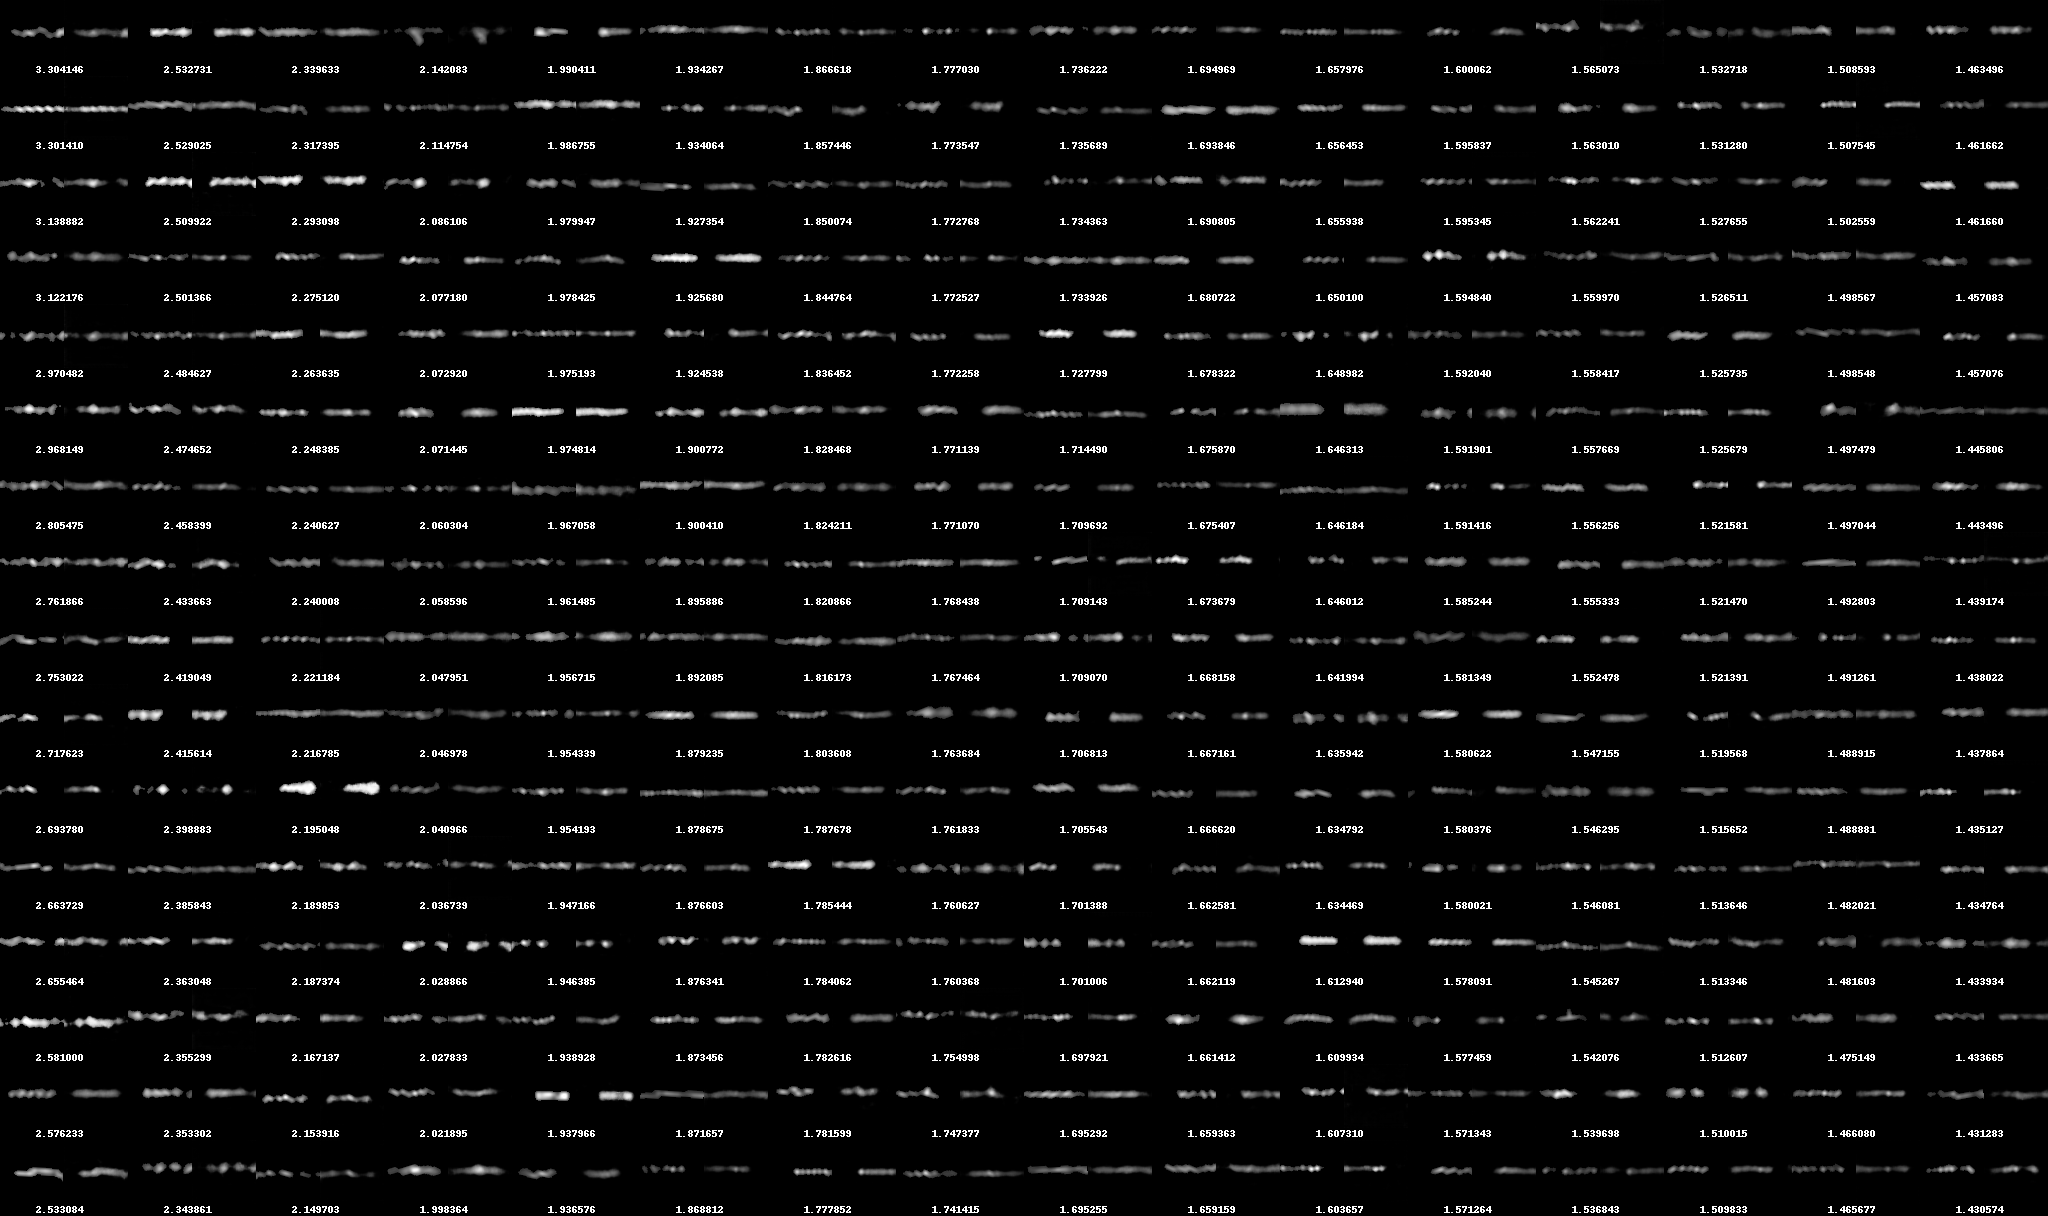

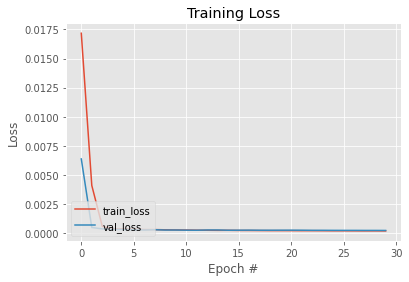

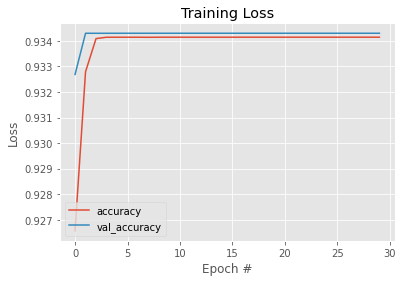

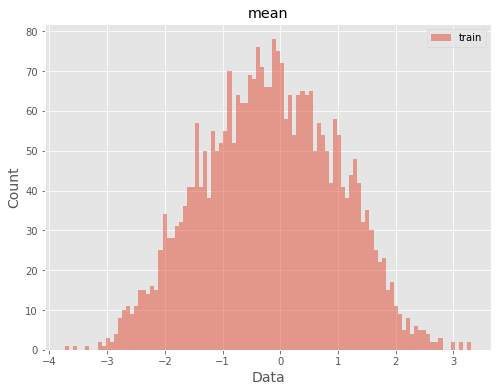

In [4]:
load_and_train(TRACKS_DST, TRACKS_AC)

320
0
128
18496
0
256
0
262160
278528
0
36928
0
256
18464
0
128
289
Epoch 1/30
341/341 [==============================] - 8s 20ms/step - loss: 0.0411 - accuracy: 0.8894 - val_loss: 0.0250 - val_accuracy: 0.9057
Epoch 2/30
341/341 [==============================] - 7s 22ms/step - loss: 0.0212 - accuracy: 0.9055 - val_loss: 0.0227 - val_accuracy: 0.9057
Epoch 3/30
341/341 [==============================] - 5s 14ms/step - loss: 0.0196 - accuracy: 0.9056 - val_loss: 0.0199 - val_accuracy: 0.9058
Epoch 4/30
341/341 [==============================] - 11s 32ms/step - loss: 0.0173 - accuracy: 0.9066 - val_loss: 0.0166 - val_accuracy: 0.9061
Epoch 5/30
341/341 [==============================] - 5s 14ms/step - loss: 0.0073 - accuracy: 0.9117 - val_loss: 0.0030 - val_accuracy: 0.9130
Epoch 6/30
341/341 [==============================] - 8s 23ms/step - loss: 0.0032 - accuracy: 0.9127 - val_loss: 0.0026 - val_accuracy: 0.9130
Epoch 7/30
341/341 [==============================] - 11s 31ms/step - los

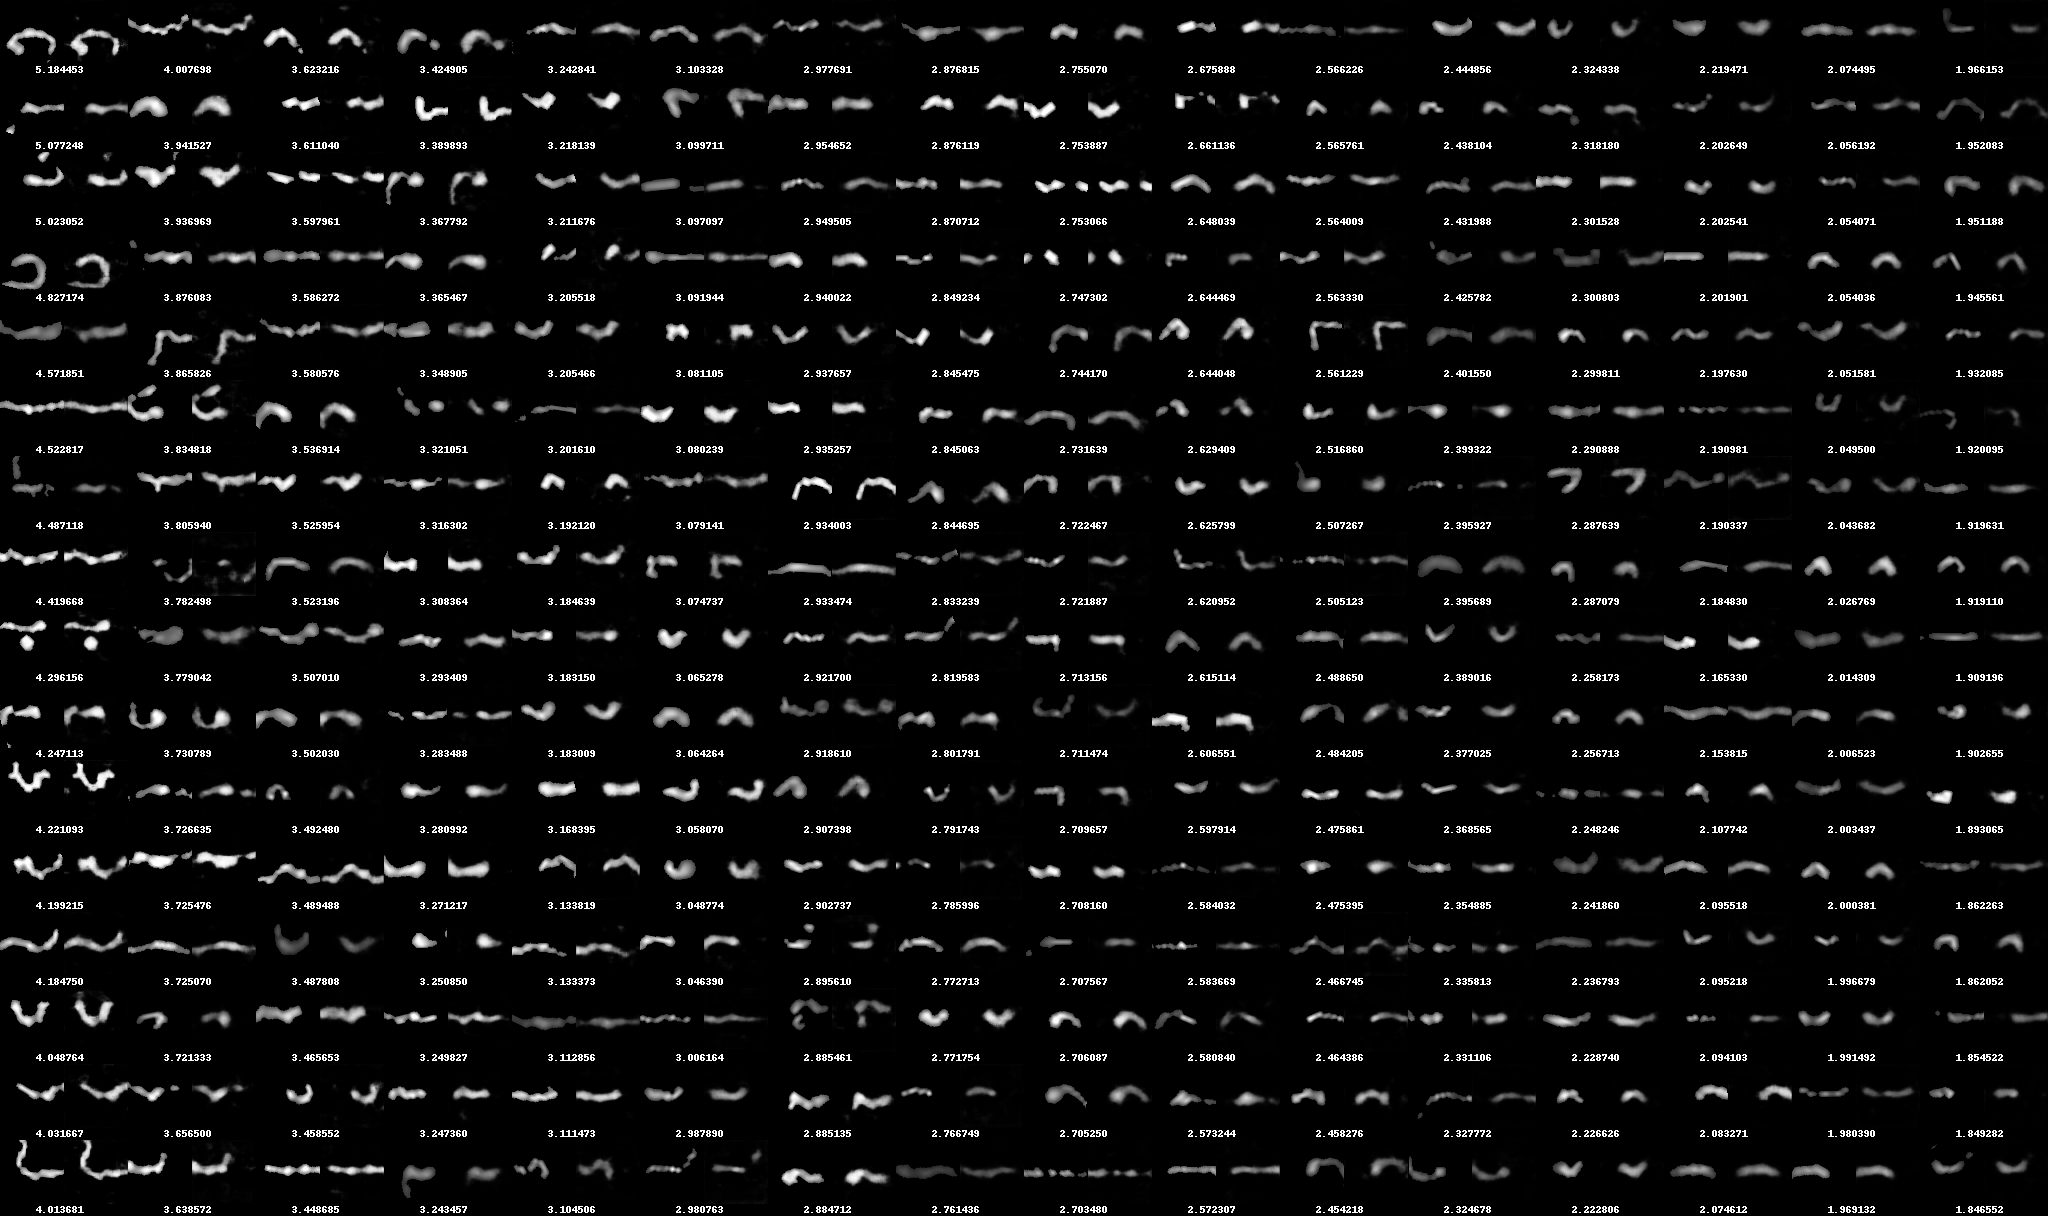

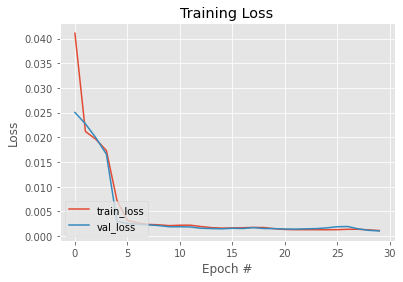

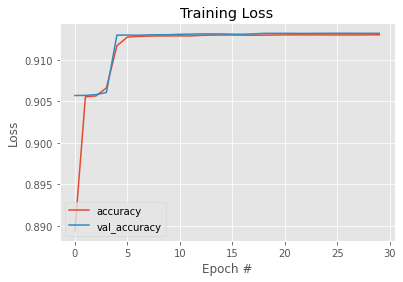

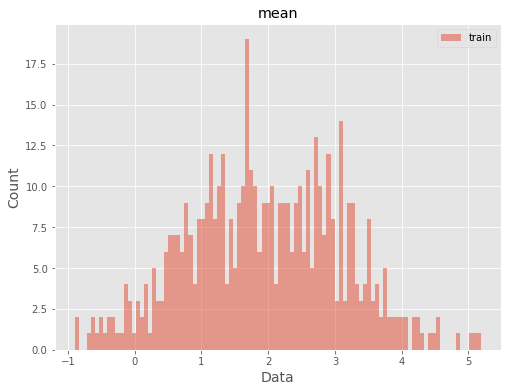

In [5]:
load_and_train(WORMS_DST, WORMS_AC)

320
0
128
18496
0
256
0
262160
278528
0
36928
0
256
18464
0
128
289
Epoch 1/30
445/445 [==============================] - 7s 15ms/step - loss: 0.0443 - accuracy: 0.9122 - val_loss: 0.0194 - val_accuracy: 0.9338
Epoch 2/30
445/445 [==============================] - 8s 18ms/step - loss: 0.0160 - accuracy: 0.9355 - val_loss: 0.0164 - val_accuracy: 0.9322
Epoch 3/30
445/445 [==============================] - 7s 15ms/step - loss: 0.0076 - accuracy: 0.9409 - val_loss: 0.0035 - val_accuracy: 0.9443
Epoch 4/30
445/445 [==============================] - 9s 21ms/step - loss: 0.0026 - accuracy: 0.9441 - val_loss: 0.0025 - val_accuracy: 0.9444
Epoch 5/30
445/445 [==============================] - 6s 14ms/step - loss: 0.0018 - accuracy: 0.9441 - val_loss: 0.0023 - val_accuracy: 0.9444
Epoch 6/30
445/445 [==============================] - 9s 21ms/step - loss: 0.0017 - accuracy: 0.9441 - val_loss: 0.0020 - val_accuracy: 0.9444
Epoch 7/30
445/445 [==============================] - 15s 33ms/step - loss

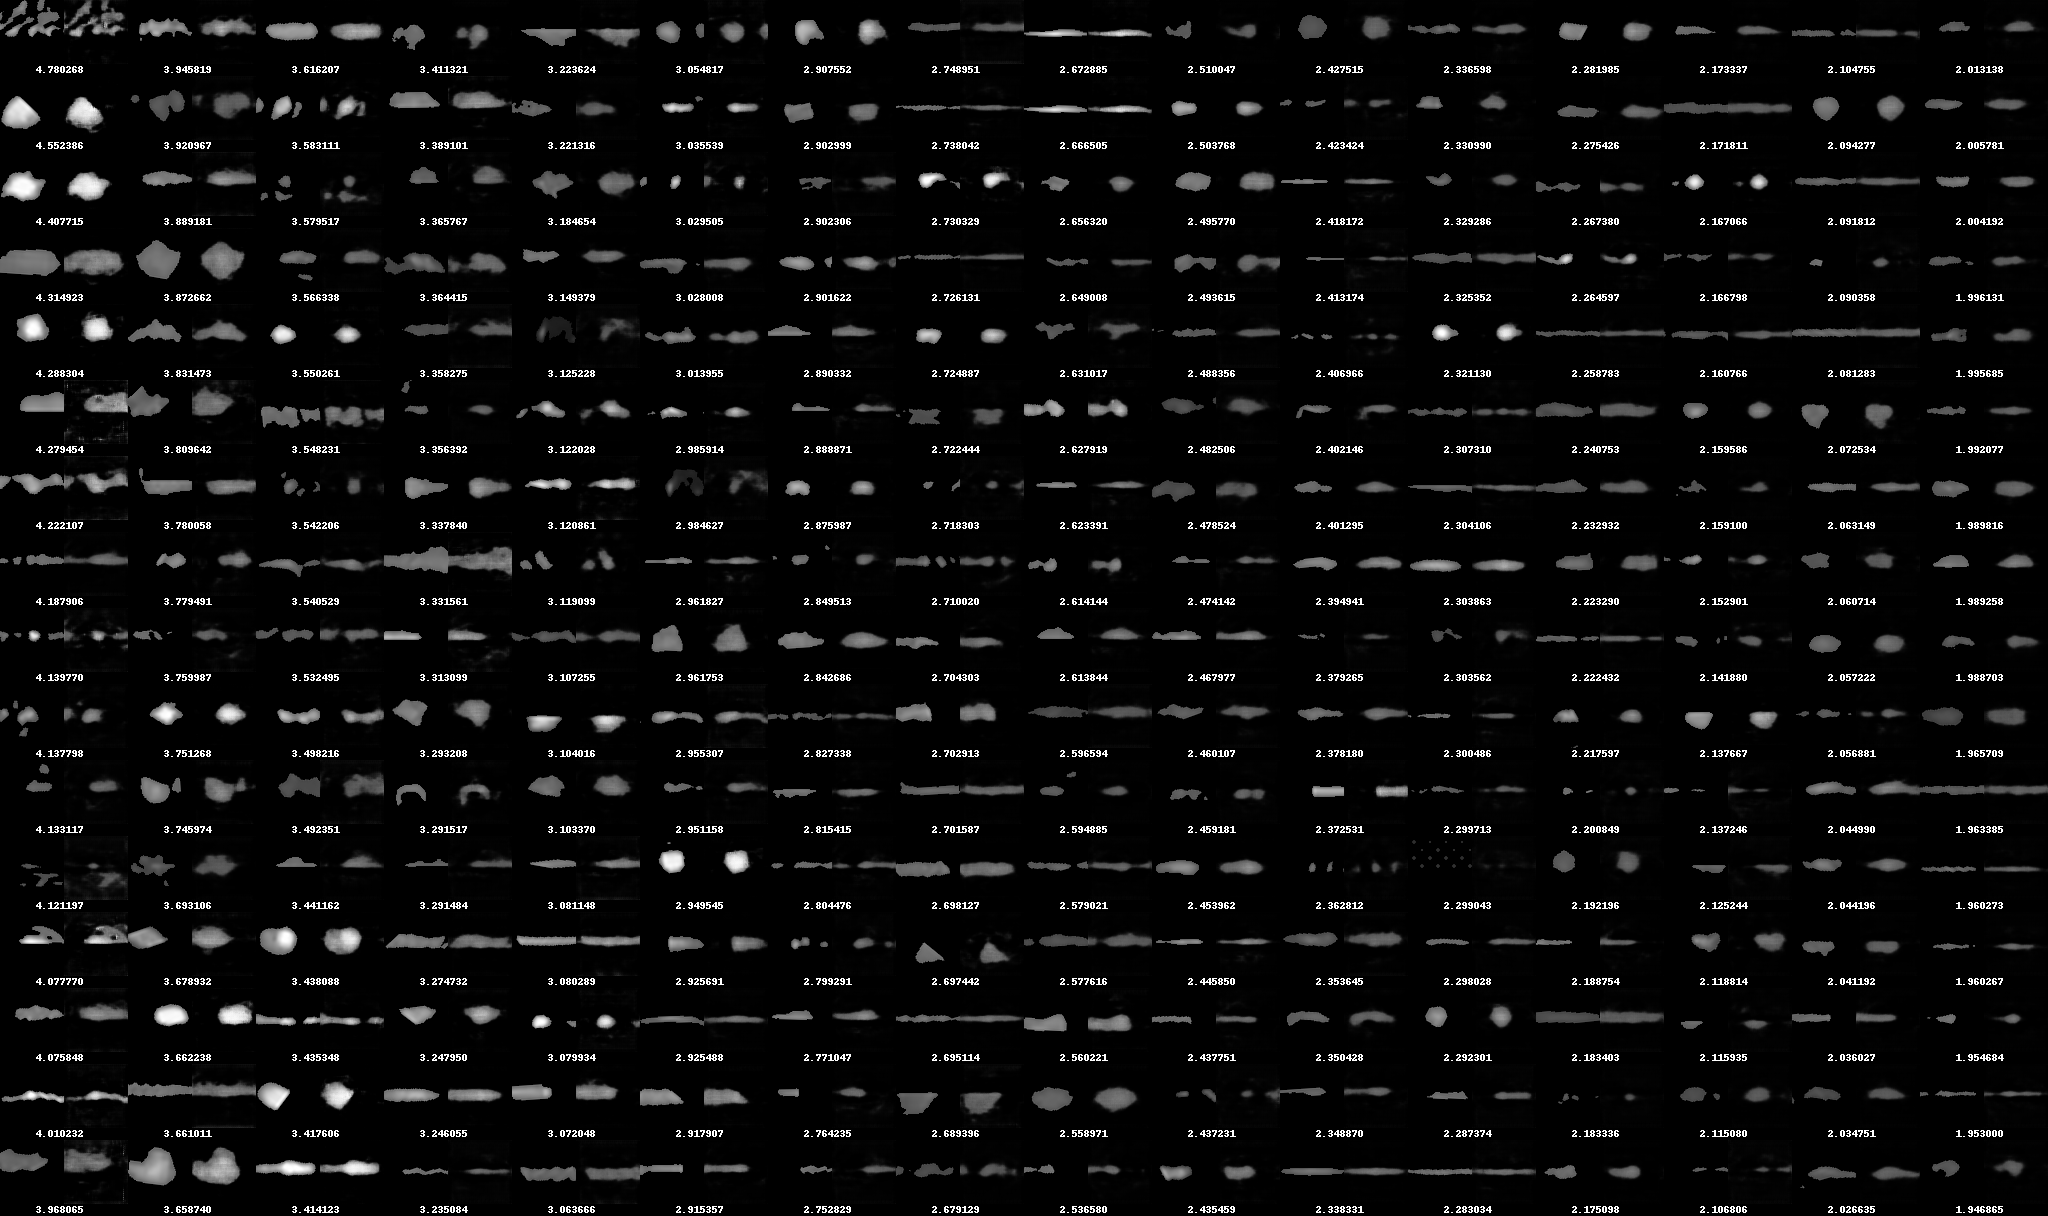

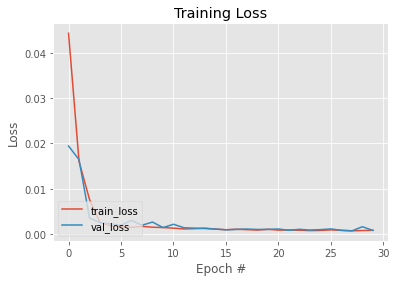

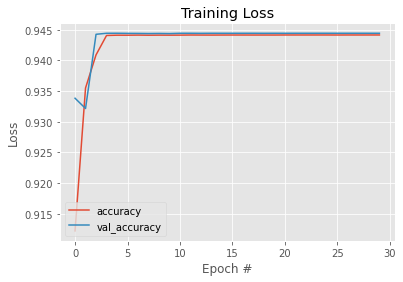

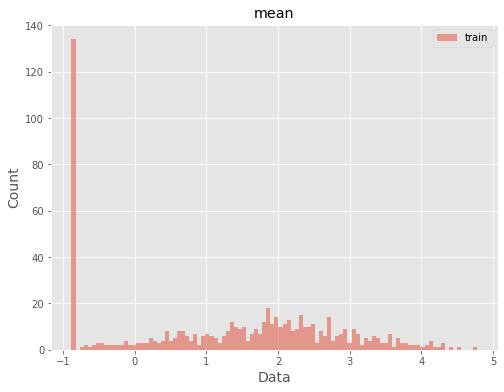

In [6]:
load_and_train(ARTIFACTS_DST, ARTIFACTS_AC)